In [246]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as stats
import pylab
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import math
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Roboto']
rcParams['font.size'] = 20
from matplotlib.colors import ListedColormap
from sklearn import datasets
from random import randint
from nltk.corpus import stopwords

col = ['#ef4631', '#10b9ce', '#2292ec', '#ff9138', '#3f50b0', '#f7bb09']
cols_light = ['#f47f71', '#72dde9','#66b4f2','#ffb478','#7a86c8','#f9cf55']

In [56]:
def plot_scatter_2d(df, x1, x2, y, ax=None):
    """"
    Description: Plots a scatter plot of two dependent variables, with different color/shape per class
    IMPORTRANT: Works for only 2 independent variables, given 1 dependent
    
    Parameters:
        df(n x m): dataframe containing variables of interest
        x1 (string): name of x-axis variable
        x2 (string): name of y-axis variable
        y (string): name of labels
        
    Returns:
        Scatter plot
    """
    if ax == None:
        f, ax = plt.subplots(1, figsize = (10,8))
        
    for idx, cl in enumerate(np.unique(df[y])):
        
        ax.scatter(x=df[df[y]==cl][x1], 
                   y=df[df[y]==cl][x2],
                   label = cl,
                   c = col[idx],
                   s = 100)

        
    if ax == None:
        plt.title(x1 + ' vs ' + x2)
        plt.legend()
        plt.xlabel(x1)
        plt.ylabel(x2)
        plt.show()
    
    

    
def plot_assignments(df, mean1, mean2, mean3, wLabel = False):
    temp_df = df.copy()
    cluster_mem = []
    for i in range(df.shape[0]):
        pt = (df[feature1][i],df[feature2][i])
        
        dist1 = np.sqrt((pt[0]-mean1[0])**2 + (pt[1]-mean1[1])**2)
        dist2 = np.sqrt((pt[0]-mean2[0])**2 + (pt[1]-mean2[1])**2)
        dist3 = np.sqrt((pt[0]-mean3[0])**2 + (pt[1]-mean3[1])**2)
        
        cluster_mem.append(np.argmin([dist1, dist2, dist3]))
    
    temp_df['Cluster'] = cluster_mem    
    
    if wLabel == False:
        f, ax = plt.subplots(1, figsize = (8,6))
        for idx, cl in enumerate(np.unique(temp_df['Cluster'])):

            ax.scatter(x=temp_df[temp_df['Cluster']==cl][feature1], 
                       y=temp_df[temp_df['Cluster']==cl][feature2],
                       c = col_ex[idx],
                       label=labelling[idx],
                       s = 100, alpha = 0.1)

        ax.scatter(x = mean1[0], y = mean1[1], color = col_ex[0], s = 200)
        ax.scatter(x = mean2[0], y = mean2[1], color = col_ex[1], s = 200)
        ax.scatter(x = mean3[0], y = mean3[1], color = col_ex[2], s = 200)

        #plt.legend()
        plt.xlabel(feature1)
        plt.ylabel(feature2)

        plt.show()
        
    else:
        
        f, ax = plt.subplots(1,2, figsize = (20, 10))
        for idx, cl in enumerate(np.unique(temp_df['Cluster'])):

            ax[0].scatter(x=temp_df[temp_df['Cluster']==cl][feature1], 
                       y=temp_df[temp_df['Cluster']==cl][feature2],
                       c = col_ex[idx],
                       s = 100, alpha = 0.1)

        ax[0].scatter(x = mean1[0], y = mean1[1], color = col_ex[0], s = 200)
        ax[0].scatter(x = mean2[0], y = mean2[1], color = col_ex[1], s = 200)
        ax[0].scatter(x = mean3[0], y = mean3[1], color = col_ex[2], s = 200)
        
        ax[0].set_title('Clustering Result')
        ax[1].set_title('Actual Data')
        
        
        ax[0].set_xlabel([feature1])
        ax[0].set_ylabel([feature2])
        ax[1].set_xlabel([feature1])
        ax[1].set_ylabel([feature2])

        
        plt.xlabel(feature1)
        plt.ylabel(feature2)

        for idx, cl in enumerate(np.unique(temp_df['species'])):

            ax[1].scatter(x=temp_df[temp_df['species']==cl][feature1], 
                       y=temp_df[temp_df['species']==cl][feature2],
                       c = col_ex[idx],
                       label=labelling[idx],
                       s = 100)
        
        plt.legend()
        plt.show()
              

    new_mean1 = temp_df[temp_df.Cluster == 0].mean(axis = 0)
    new_mean2 = temp_df[temp_df.Cluster == 1].mean(axis = 0)
    new_mean3 = temp_df[temp_df.Cluster == 2].mean(axis = 0)
    
    return (new_mean1, new_mean2, new_mean3)

In [3]:
clust_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/Analytics%20Edge/DailyKos.csv')

In [5]:
iris = datasets.load_iris()
iris = pd.DataFrame(iris.data)
iris.columns = datasets.load_iris().feature_names
features = datasets.load_iris().target_names
iris['species'] = datasets.load_iris().target
iris['species_name'] =  [features[x] for x in iris['species']]

In [8]:
pt1 = randint(0, 149)
pt2 = randint(0, 149)
pt3 = randint(0, 149)

pt1_perm = 120
pt2_perm = 54
pt3_perm = 86

pt1 = iris.iloc[pt1_perm, :]
pt2 = iris.iloc[pt2_perm, :]
pt3 = iris.iloc[pt3_perm, :]


def clust_plot(feature1, feature2):
    plt.figure(figsize=(10,8))
    plt.scatter(x = iris[feature1], y =iris[feature2], color = col[2], alpha = 0.3)
    plt.scatter(x = pt1[feature1], y = pt1[feature2], color = col[0], s=100)
    plt.scatter(x = pt2[feature1], y = pt2[feature2], color = col[3], s=100)
    plt.scatter(x = pt3[feature1], y = pt3[feature2], color = col[4], s=100)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

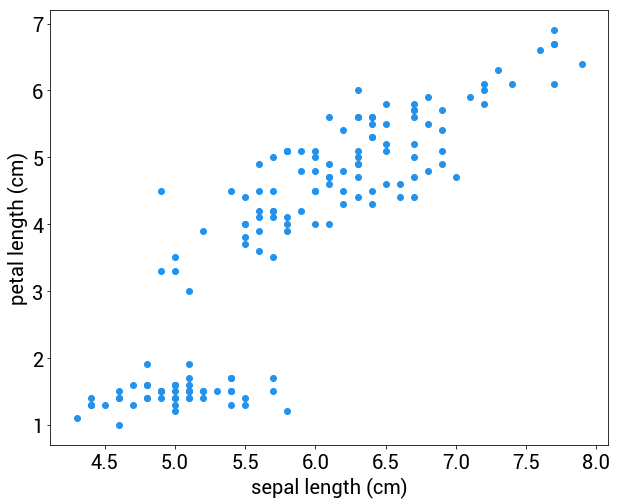

In [350]:
#Plot sample data
feature1 = 'sepal length (cm)'
feature2 = 'petal length (cm)'
label = 'species'
plt.figure(figsize=(10,8))
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.scatter(x = iris[feature1], y =iris[feature2], color = col[2])
plt.show()

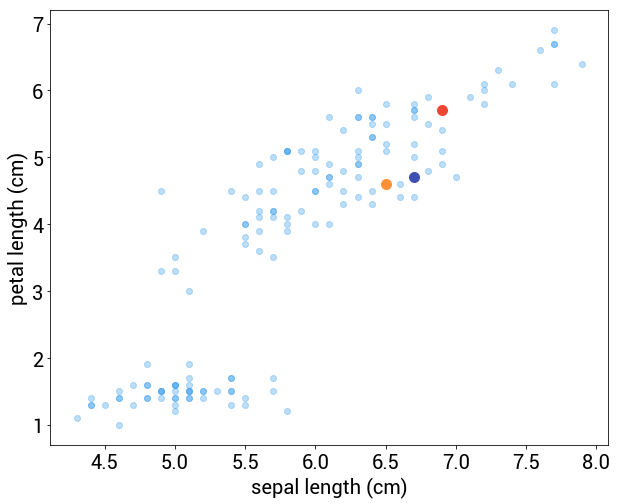

In [351]:
#Plot sample data
feature1 = 'sepal length (cm)'
feature2 = 'petal length (cm)'
label = 'species'
pt1,pt2,pt3 = iris.iloc[pt1_perm, :], iris.iloc[pt2_perm, :],iris.iloc[pt3_perm, :]


clust_plot(feature1, feature2)

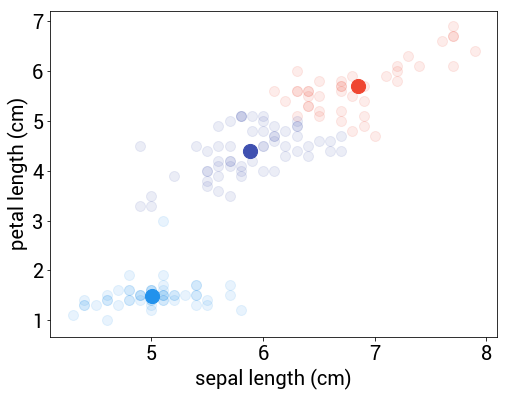

In [359]:
col_ex = ['#ef4631', '#2292ec', '#3f50b0']
labelling = ['setosa', 'versicolor', 'virginica']

pt1, pt2, pt3 = plot_assignments(iris, (pt1[feature1],pt1[feature2]),(pt2[feature1],pt2[feature2]),(pt3[feature1],pt3[feature2]))



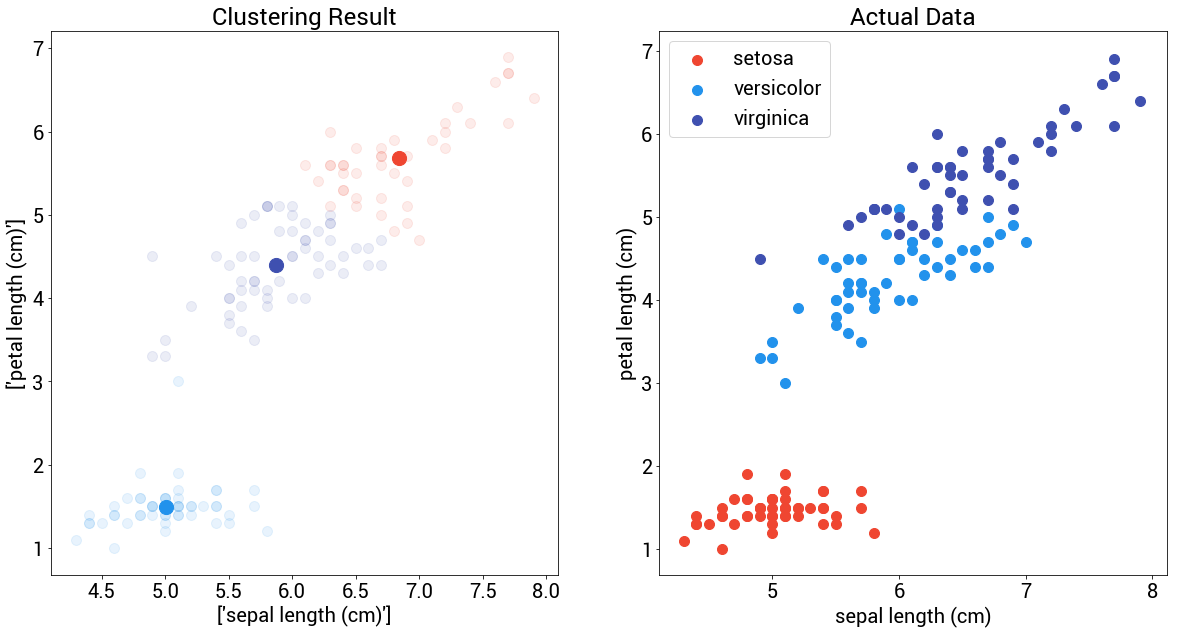

In [360]:
pt1, pt2, pt3 = plot_assignments(iris, (pt1[feature1],pt1[feature2]),(pt2[feature1],pt2[feature2]),(pt3[feature1],pt3[feature2]), True)


In [21]:
from sklearn.cluster import KMeans

/Users/magtanggoldg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


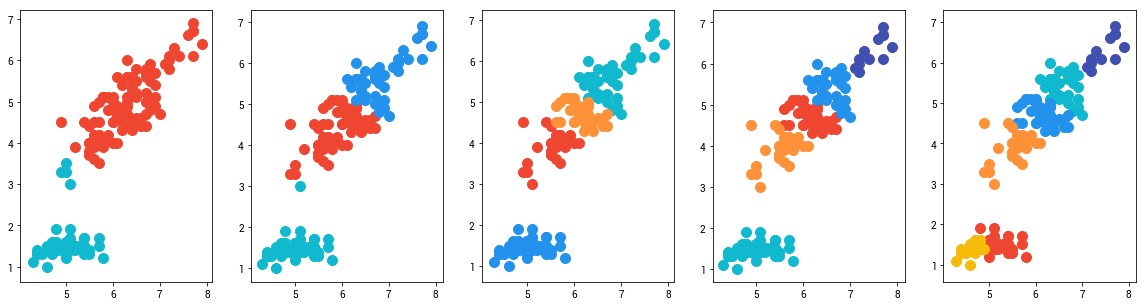

In [61]:
#Plot sample data
feature1 = 'sepal length (cm)'
feature2 = 'petal length (cm)'
temp_df = iris[[feature1, feature2]]
inert = {}
f, ax = plt.subplots(1, 5, figsize=(20,5))
for i in range(2, 7):
    clust = KMeans(n_clusters = i)
    clust.fit(temp_df)
    temp_df['cluster'] = clust.predict(temp_df)
    plot_scatter_2d(temp_df, feature1, feature2, 'cluster', ax[i-2])
    
    inert[i] = clust.inertia_
    
plt.show()

/Users/magtanggoldg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


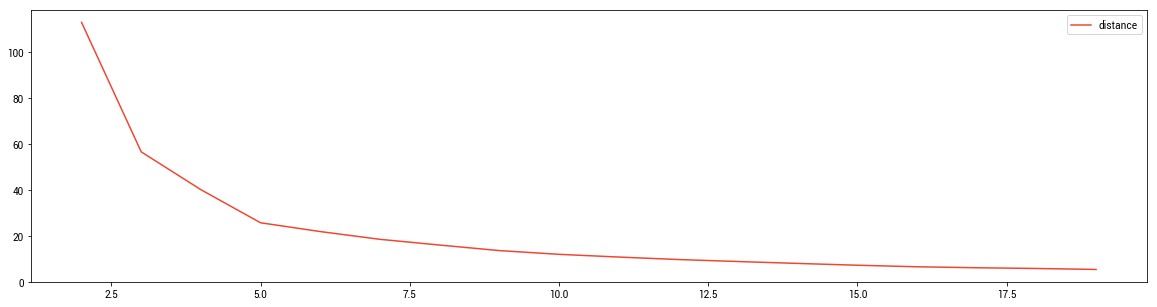

In [70]:
feature1 = 'sepal length (cm)'
feature2 = 'petal length (cm)'
temp_df = iris[[feature1, feature2]]
inert = {}
for i in range(2, 20):
    clust = KMeans(n_clusters = i)
    clust.fit(temp_df)
    temp_df['cluster'] = clust.predict(temp_df)
    inert[i] = clust.inertia_

pd.DataFrame({'distance':inert}).plot(figsize=(20,5), color = col[0])

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster

In [149]:
Z = linkage(iris[[feature1, feature2]],'centroid', metric = 'euclidean', optimal_ordering=True)
c, coph_dists = cophenet(Z, pdist(iris[[feature1, feature2]]))
c

0.87616532785810541

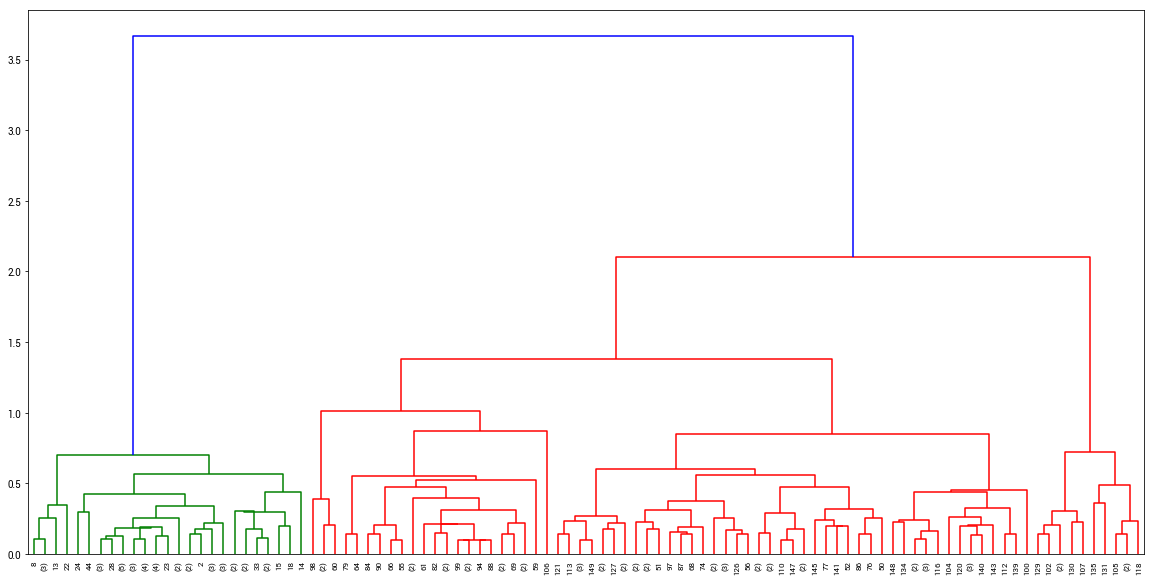

In [150]:
#list = [str(np.argsort(topic_df.loc[x,:]).values[-1]) + "|" + x.replace('.', "") for x in list(topic_df.index)]
fig = plt.figure(figsize=(20, 10))
dn = dendrogram(Z,  p = 100, truncate_mode='lastp', leaf_rotation=90,leaf_font_size=8)
plt.show()

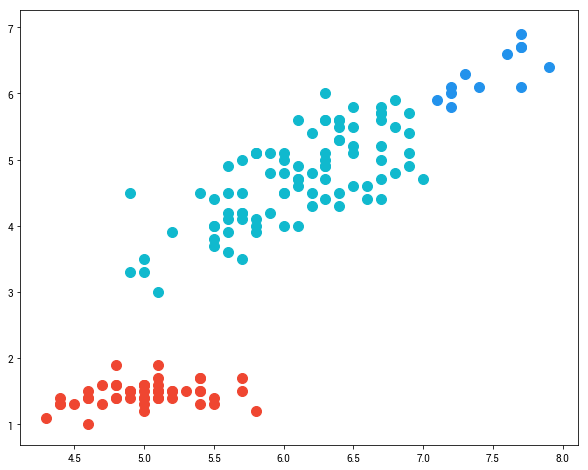

In [151]:
temp_df = iris
temp_df['cluster'] = fcluster(Z, t = 1.5, criterion = 'distance')
plot_scatter_2d(temp_df, feature1, feature2, 'cluster')

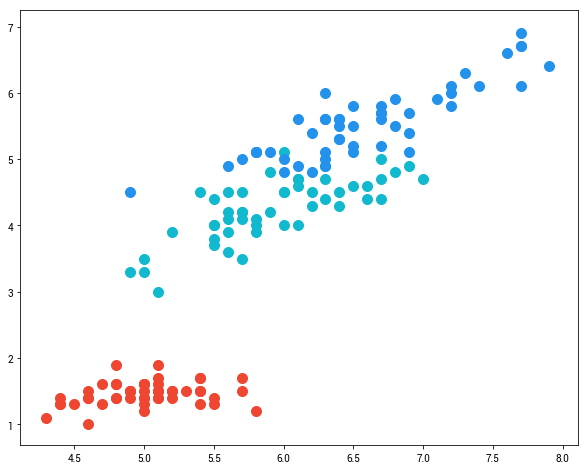

In [152]:
plot_scatter_2d(iris, feature1, feature2, 'species')

In [303]:
clust_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/Analytics%20Edge/DailyKos.csv')
stop_words = [re.sub(r'[^\w\s]','',x) for x in stopwords.words('english')] + ['yeah']
clust_df = clust_df.drop(clust_df.columns[[x in stop_words for x in clust_df.columns]], axis = 1)

In [304]:
clust_df.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,written,wrong,wrote,yahoo,year,yesterday,york,young,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


In [323]:
#clust_df_short = clust_df[list(clust_df.mean(axis = 0).sort_values(ascending=False).index)[:10]]
clust_df_short = clust_df

In [324]:
Z = linkage(clust_df_short,metric = 'euclidean', optimal_ordering=True)

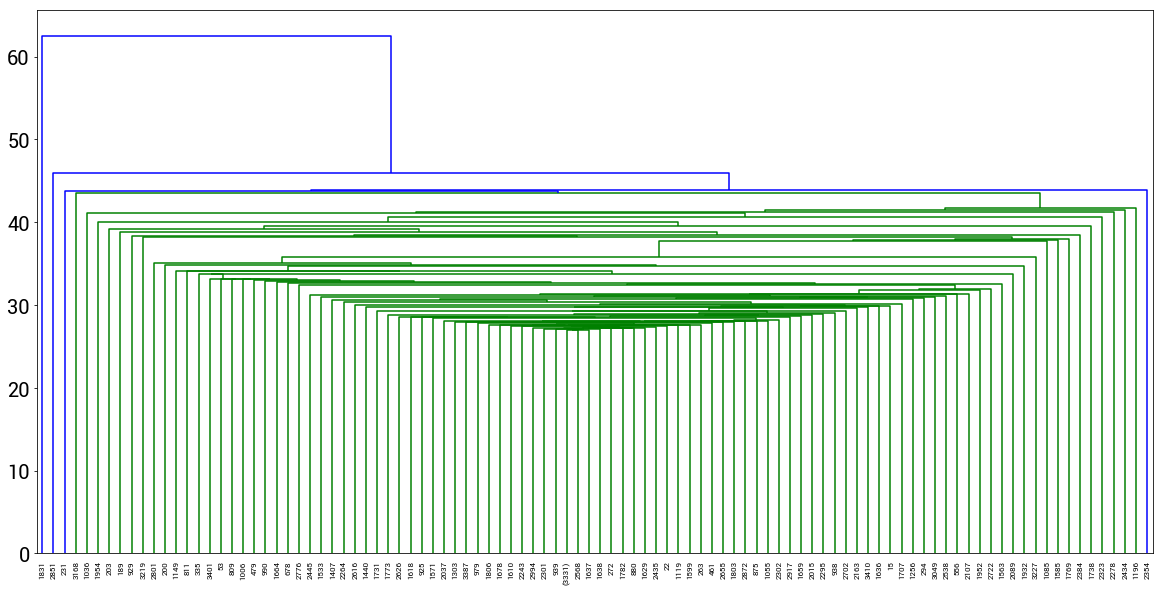

In [327]:
fig = plt.figure(figsize=(20, 10))
dn = dendrogram(Z,  p = 100, truncate_mode='lastp', leaf_rotation=90,leaf_font_size=8)
plt.show()

In [328]:
clust_df_short['cluster'] = fcluster(Z, t = 2, criterion = 'maxclust')

In [331]:
clust1 = pd.DataFrame(clust_df_short[clust_df_short['cluster'] ==1].drop('cluster', axis = 1).mean(axis = 0).sort_values(ascending = False).head())

In [332]:
clist2 = pd.DataFrame(clust_df_short[clust_df_short['cluster'] ==2].drop('cluster', axis = 1).mean(axis = 0).sort_values(ascending = False).head())

In [335]:

clist2

,0
threat,44.0
iraq,30.0
weapon,20.0
presided,20.0
bush,18.0


In [337]:
inert = {}
for i in range(2, 20):
    clust = KMeans(n_clusters = i)
    clust.fit(clust_df_short.drop('cluster', axis = 1))
    inert[i] = clust.inertia_
    #clust_df_short['cluster'] = clust.predict(clust_df_short.drop('cluster', axis = 1))

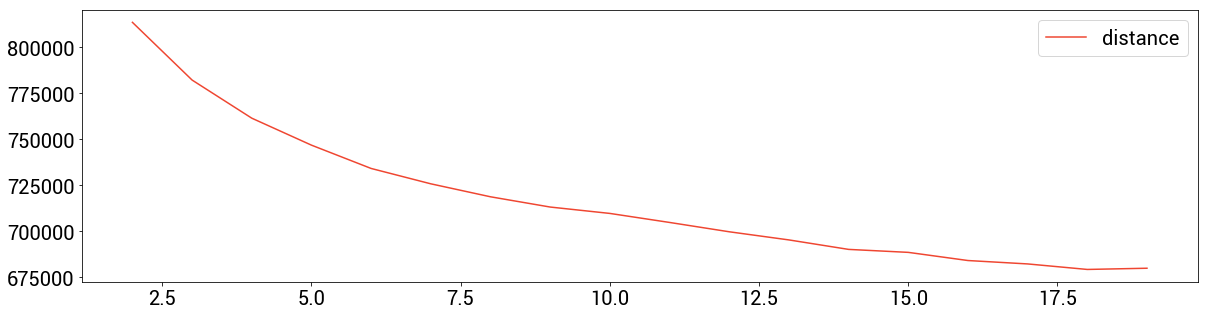

In [338]:
pd.DataFrame({'distance':inert}).plot(figsize=(20,5), color = col[0])

In [340]:
clust = KMeans(n_clusters = 17)
clust.fit(clust_df_short.drop('cluster', axis = 1))
inert[i] = clust.inertia_
clust_df_short['cluster'] = clust.predict(clust_df_short.drop('cluster', axis = 1))
clust_df_short.cluster.value_counts()

5     1559
11     304
15     243
10     214
12     194
13     189
1      166
7      159
16     148
3      131
2       46
0       44
8       19
14       6
4        6
9        1
6        1
Name: cluster, dtype: int64

In [346]:
pd.DataFrame(clust_df_short.cluster.value_counts())

,cluster
5,1559
11,304
15,243
10,214
12,194
13,189
1,166
7,159
16,148
3,131


In [347]:
pd.DataFrame(clust_df_short[clust_df_short.cluster == 5].drop('cluster', axis = 1).mean(axis = 0).sort_values(ascending = False).head())

,0
bush,0.966645
kerry,0.615138
democrat,0.558691
general,0.495189
elect,0.464400


In [348]:
pd.DataFrame(clust_df_short[clust_df_short.cluster == 11].drop('cluster', axis = 1).mean(axis = 0).sort_values(ascending = False).head())

,0
republican,3.029605
democrat,2.973684
elect,1.953947
state,1.845395
senate,1.802632


In [349]:
pd.DataFrame(clust_df_short[clust_df_short.cluster == 15].drop('cluster', axis = 1).mean(axis = 0).sort_values(ascending = False).head())

,0
bush,7.201646
administration,2.382716
presided,1.893004
iraq,1.139918
house,1.045267


In [345]:
clust_df_short[clust_df_short.cluster == 10].drop('cluster', axis = 1).mean(axis = 0).sort_values(ascending = False).head()

poll       5.504673
bush       2.331776
kerry      1.943925
percent    1.598131
voter      1.214953
dtype: float64